In [61]:
import FunctionsLibrary as fn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Neural Network Classification

## Wisconsin Breast Cancer Data

In [62]:
# Breast Cancer data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# One-hot encoded
Y = fn.to_categorical_numpy(y)

# Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

# Scaling
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
X_test_scaled.T.shape

(30, 114)

In [63]:
n_categories = Y.shape[1]
n_features = X.shape[1]
print("Number of categories:", n_categories)
print("Number of features:", n_features)

Number of categories: 2
Number of features: 30


In [79]:
hidden_layers = [('relu',0),('relu',0.01),'softmax']
layer_dims=[n_features,6,4,n_categories]
NNclassifier = fn.NN(layer_dims=layer_dims,
                     hidden_layers=hidden_layers,
                     cost_function="CrossEntropy",
                     optimization_method = "SGDM",
                     batch_size = 32,
                     max_epoch=100, 
                     verbose=1, 
                     #penalty="l2",
                     lamb=0.001,
                     learning_rate=0.1)

In [80]:
NNclassifier.fit(X_train_scaled.T,Y_train.T)

Initilizing Weights...
Starting Training...
Cost function after epoch 10: 0.06666543969088025
Cost function after epoch 20: 0.03765502506256842
Cost function after epoch 30: 0.02616304273679515
Cost function after epoch 40: 0.018691666928010418
Cost function after epoch 50: 0.015134427797151136
Cost function after epoch 60: 0.01138060464670495
Cost function after epoch 70: 0.00852857035369637
Cost function after epoch 80: 0.005897916662086419
Cost function after epoch 90: 0.004435499581067788
Cost function after epoch 100: 0.0034895785049988428


Text(0.5, 1.0, 'Loss and accuracy after each epoch')

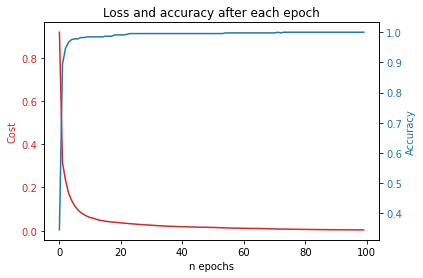

In [81]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(NNclassifier.costs,color=color, label="Cost function")
ax1.set_xlabel("n epochs")
ax1.set_ylabel("Cost",color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(NNclassifier.acc, label="accuracy",color=color)
ax2.set_ylabel("Accuracy",color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Loss and accuracy after each epoch")


In [82]:
Y_tilde = NNclassifier.predict(X_train_scaled.T)
Y_pred = NNclassifier.predict(X_test_scaled.T)

NN_train_acc = fn.accuracy(Y_train, np.argmax(Y_tilde, axis=0))
NN_test_acc = fn.accuracy(Y_test, np.argmax(Y_pred, axis=0))
print("NN Training accuracy: %.3f" % NN_train_acc )
print("NN Testing accuracy: %.3f" % NN_test_acc )

NN Training accuracy: 1.000
NN Testing accuracy: 0.947


# Loading the MNIST data base
## There are 1797 images of size 8x8 pixels in "grayscale"

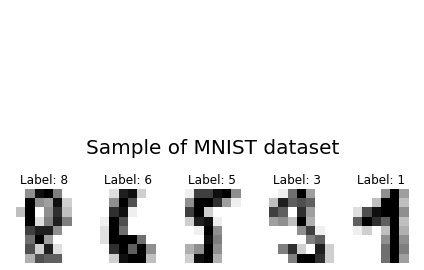

In [114]:
from sklearn import datasets

digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)

# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.suptitle(" \n\n\n\n\n\nSample of MNIST dataset", fontsize=20)
plt.tight_layout()
plt.show()


In [86]:
X = inputs
Y = fn.to_categorical_numpy(labels)
n_features = X.shape[1]
n_categories = Y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

# Reshaping to fit into the Neural Network
X_train, X_test = X_train.T, X_test.T
Y_train, Y_test = Y_train.T, Y_test.T

## Setting up the NN for classification

In [99]:
hidden_layers = [('relu',0),('relu',0.001),'softmax']
layer_dims=[n_features,20,10,n_categories]

NNclassifier = fn.NN(layer_dims=layer_dims, 
                     hidden_layers=hidden_layers, 
                     cost_function='CrossEntropy',
                     optimization_method = "SGDM",
                     batch_size = 32, 
                     max_epoch=100, 
                     penalty="l2",
                     lamb=0,
                     verbose=1, 
                     learning_rate=0.05)

In [100]:
NNclassifier.fit(X_train, Y_train)

Initilizing Weights...
Starting Training...
Cost function after epoch 10: 1.4199460785754534
Cost function after epoch 20: 0.5665818763811897
Cost function after epoch 30: 0.1840189783260567
Cost function after epoch 40: 0.15772305478559603
Cost function after epoch 50: 0.0844612072518627
Cost function after epoch 60: 0.08227384922533129
Cost function after epoch 70: 0.04295724303456026
Cost function after epoch 80: 0.024416742397266773
Cost function after epoch 90: 0.03094199474883636
Cost function after epoch 100: 0.024148484466575703


Text(0.5, 1.0, 'Loss and accuracy after each epoch')

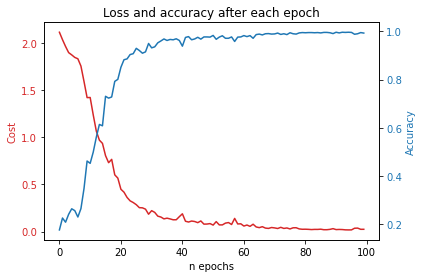

In [101]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(NNclassifier.costs,color=color, label="Cost function")
ax1.set_xlabel("n epochs")
ax1.set_ylabel("Cost",color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(NNclassifier.acc, label="accuracy",color=color)
ax2.set_ylabel("Accuracy",color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Loss and accuracy after each epoch")


In [102]:
Y_tilde = NNclassifier.predict(X_train)
Y_pred = NNclassifier.predict(X_test)

NN_train_acc = fn.accuracy(Y_train.T, np.argmax(Y_tilde, axis=0))
NN_test_acc = fn.accuracy(Y_test.T, np.argmax(Y_pred, axis=0))
print("NN Training accuracy: %.3f" % NN_train_acc )
print("NN Testing accuracy: %.3f" % NN_test_acc )

NN Training accuracy: 0.993
NN Testing accuracy: 0.928


In [106]:
# Looping over different lambdas
lamb_array = np.logspace(-5,3,40)
mean_counter = 20
train_acc = np.zeros(lamb_array.shape)
test_acc = np.zeros(lamb_array.shape)

hidden_layers = [('relu',0),('relu',0.001),'softmax']
layer_dims=[n_features,20,10,n_categories]
for i in range(len(lamb_array)):
    NNclassifier = fn.NN(layer_dims=layer_dims, 
                         hidden_layers=hidden_layers, 
                         cost_function='CrossEntropy',
                         optimization_method = "Adam",
                         batch_size = 32, 
                         max_epoch=300, 
                         penalty="l2",
                         lamb=lamb_array[i],
                         verbose=0, 
                         learning_rate=0.001)
    NNclassifier.fit(X_train, Y_train)
    Y_tilde = NNclassifier.predict(X_train)
    Y_pred = NNclassifier.predict(X_test)
    train_acc[i] = fn.accuracy(Y_train.T, np.argmax(Y_tilde, axis=0))
    test_acc[i] = fn.accuracy(Y_test.T, np.argmax(Y_pred, axis=0))



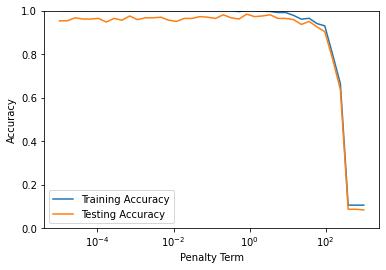

In [107]:
plt.plot(lamb_array, train_acc, label="Training Accuracy")
plt.plot(lamb_array, test_acc, label="Testing Accuracy")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.xlabel("Penalty Term")
plt.ylim(0,1)
plt.legend()

# Testing more intercatively with showing example image and then feeding it into the Neural Network

In [ ]:
## Selecting a figure
indices = np.arange(len(X_test.T))
entries = 5
random_indices = np.random.choice(indices, size=entries)

testing = X_test.T
fig = plt.figure()
for i, img in enumerate(testing[random_indices]):
    plt.subplot(1, entries, i+1)
    plt.axis('off')
    plt.imshow(img.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    pred_int = np.argmax(NNclassifier.predict(img.reshape(-1,1)), axis=0)[0]
    label_digit = np.argmax(Y_test[:,random_indices[i]], axis=0)
    plt.title("Label %d \n Prediction: %i" % (label_digit,np.int(pred_int)))
plt.tight_layout()
fig.suptitle("\n\nSample of Logistic Regression predictions", fontsize=20)
plt.show()

# Logistic regression on the MNIST data

In [ ]:
X = inputs
Y = fn.to_categorical_numpy(labels)
n_features = X.shape[1]
n_categories = Y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

## Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creating the model and fitting the data into the Multi-Class Logistic Regression Classifier

In [ ]:
max_epoch = 100
batch_size = 32
learning_rate = 0.001
logit_mnist = fn.logisticmulticlass(X, Y, optimizer=["SGD"],
                            learning_rate = learning_rate, 
                            batch_size = batch_size,
                            max_epoch=max_epoch)
logit_mnist.fit(X_train, Y_train)


In [ ]:
Y_tilde = logit_mnist.predict(X_train)
Y_pred = logit_mnist.predict(X_test)

In [ ]:
fn.accuracy(Y_train, np.argmax(Y_tilde, axis=1))

In [ ]:
fn.accuracy(Y_test, np.argmax(Y_pred, axis=1))

In [ ]:
X_test.shape

In [ ]:
indices = np.arange(len(X_test.T))
entries = 5
random_indices = np.random.choice(indices, size=entries)
fig = plt.figure()
for i, img in enumerate(X_test[random_indices,:]):
    plt.subplot(1, entries, i+1)
    plt.axis('off')
    plt.imshow(img.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    prediction = logit_mnist.predict(img)
    pred_int = np.argmax(prediction, axis=0)
    label_digit = np.argmax(Y_test[random_indices[i],:], axis=0)
    plt.title("Label %d \n Prediction: %i" % (label_digit,np.int(pred_int)))
plt.tight_layout()
fig.suptitle("\n\nSample of Logistic Regression predictions", fontsize=20)
plt.show()

# Using the same class for regression:

In [ ]:
import FunctionsLibrary as fn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [ ]:
datapoints  = 100
noisefactor = 0
x, y = np.linspace(0,1,datapoints), np.linspace(0,1,datapoints)
x, y = np.meshgrid(x,y) 
z = fn.FrankeFunction(x,y,noisefactor=noisefactor)

In [ ]:
X = np.array([np.ravel(x), np.ravel(y)])
z = z.reshape(1,datapoints**2) 

n_features = X.shape[0]
n_categories = 1

In [ ]:
NNregression = fn.NN(layer_dims=[X.shape[0],10,10,1], 
                      hidden_layers=["sigmoid","sigmoid","linear"],
                      cost_function="MSE", optimization_method = "Adam",
                      batch_size = 32, max_epoch=500, 
                      verbose=1, learning_rate=0.05)

In [ ]:
NNregression.fit(X,z)

In [ ]:
plt.plot(NNregression.costs)
plt.title("Cost function MSE")
plt.ylabel("0.5 MSE")
plt.xlabel("Epochs")

In [ ]:
z_pred = NNregression.predict(X)

In [ ]:
fn.frankeplot(z_pred.reshape(datapoints,datapoints), "NN prediction on the Franke Function")